In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker('^GSPC')

In [3]:
sp500 = sp500.history(period='max')

/home/nikhilagarwal/.local/lib/python3.12/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [5]:
sp500.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24150 entries, 1927-12-30 00:00:00-05:00 to 2024-02-21 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24150 non-null  float64
 1   High          24150 non-null  float64
 2   Low           24150 non-null  float64
 3   Close         24150 non-null  float64
 4   Volume        24150 non-null  int64  
 5   Dividends     24150 non-null  float64
 6   Stock Splits  24150 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.5 MB


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-07 00:00:00-05:00', '2024-02-08 00:00:00-05:00',
               '2024-02-09 00:00:00-05:00', '2024-02-12 00:00:00-05:00',
               '2024-02-13 00:00:00-05:00', '2024-02-14 00:00:00-05:00',
               '2024-02-15 00:00:00-05:00', '2024-02-16 00:00:00-05:00',
               '2024-02-20 00:00:00-05:00', '2024-02-21 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24150, freq=None)

<Axes: xlabel='Date'>

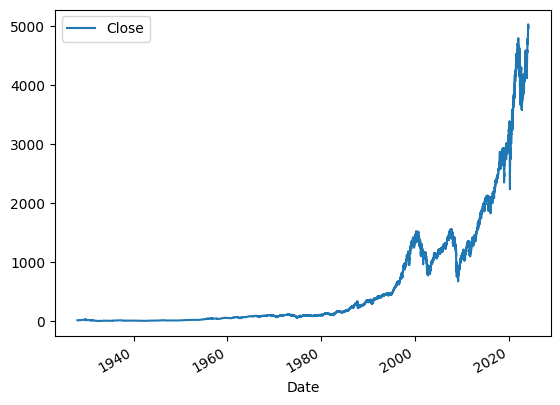

In [8]:
sp500.plot.line(y='Close',use_index = True)

In [9]:
del sp500['Dividends']
del sp500['Stock Splits']

In [10]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-14 00:00:00-05:00,4976.439941,5002.520020,4956.450195,5000.620117,3845600000,5029.729980
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,5005.569824
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766


In [12]:
sp500["Target"] = (sp500['Tomorrow']>sp500['Close']).astype(int)

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-14 00:00:00-05:00,4976.439941,5002.520020,4956.450195,5000.620117,3845600000,5029.729980,1
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,5005.569824,0
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0


In [15]:
sp500 = sp500.loc["1990-01-01":].copy()

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-14 00:00:00-05:00,4976.439941,5002.520020,4956.450195,5000.620117,3845600000,5029.729980,1
2024-02-15 00:00:00-05:00,5003.140137,5032.720215,4999.439941,5029.729980,4137970000,5005.569824,0
2024-02-16 00:00:00-05:00,5031.129883,5038.700195,4999.520020,5005.569824,3833270000,4975.509766,0


In [18]:
sp500.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    1
Target      0
dtype: int64

In [19]:
sp500.describe()

,Open,High,Low,Close,Volume,Tomorrow,Target
count,8600.000000,8600.000000,8600.000000,8600.000000,8.600000e+03,8599.000000,8600.000000
mean,1596.939868,1606.356724,1586.914337,1597.294917,2.465238e+09,1597.438842,0.534884
std,1107.083556,1112.957675,1100.919696,1107.330393,1.848390e+09,1107.314341,0.498811
min,295.450012,301.450012,294.510010,295.459991,1.499000e+07,295.459991,0.000000
25%,897.582520,908.165009,884.885025,898.522507,6.466975e+08,898.709991,0.000000
50%,1270.055054,1277.590027,1261.784973,1270.199951,2.522000e+09,1270.199951,1.000000
75%,2058.870056,2069.119995,2045.662537,2059.702454,3.836800e+09,2059.714966,1.000000
max,5031.129883,5048.390137,5016.830078,5029.729980,1.145623e+10,5029.729980,1.000000


In [20]:
import seaborn as sns


<Axes: xlabel='Close', ylabel='Date'>

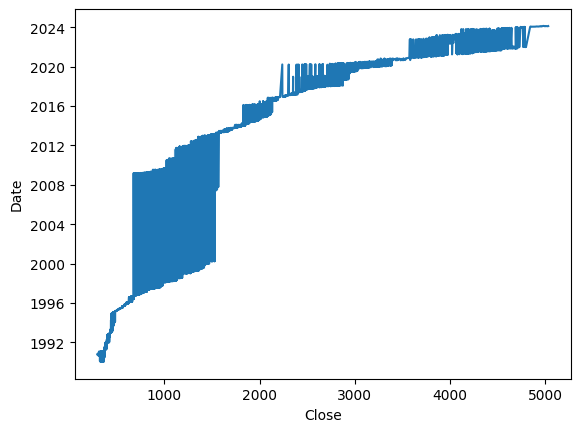

In [24]:
sns.lineplot(data=sp500,x='Close',y='Date')

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close','Volume','Open','High','Low']
model.fit(train[predictors],train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [26]:
from sklearn.metrics import precision_score

In [27]:
preds = model.predict(test[predictors])

In [28]:
preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
import pandas as pd
preds = pd.Series(preds,index = test.index)

In [30]:
preds

Date
2023-09-28 00:00:00-04:00    1
2023-09-29 00:00:00-04:00    1
2023-10-02 00:00:00-04:00    1
2023-10-03 00:00:00-04:00    1
2023-10-04 00:00:00-04:00    1
                            ..
2024-02-14 00:00:00-05:00    0
2024-02-15 00:00:00-05:00    0
2024-02-16 00:00:00-05:00    0
2024-02-20 00:00:00-05:00    0
2024-02-21 00:00:00-05:00    0
Length: 100, dtype: int64

In [31]:
precision_score(test['Target'],preds)

0.5454545454545454

In [32]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

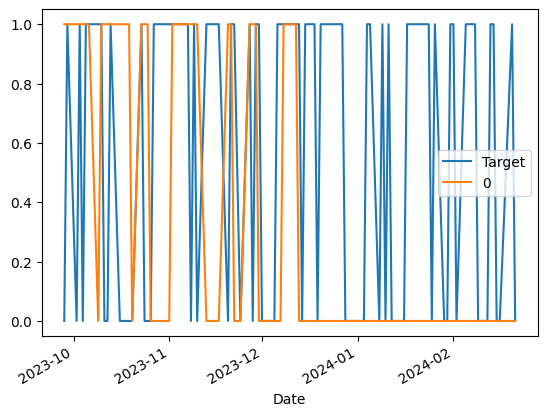

In [33]:
combined.plot()